In [15]:
import re
import pandas
from datasets.utils import TMP_DIR
from matplotlib import pyplot as plt

In [5]:
df = pandas.read_json('./billboard_winners.json', encoding='utf-8')

In [6]:
df = df.sort_values('year')

In [8]:
categories_by_year = df.groupby('year')['category'].count()

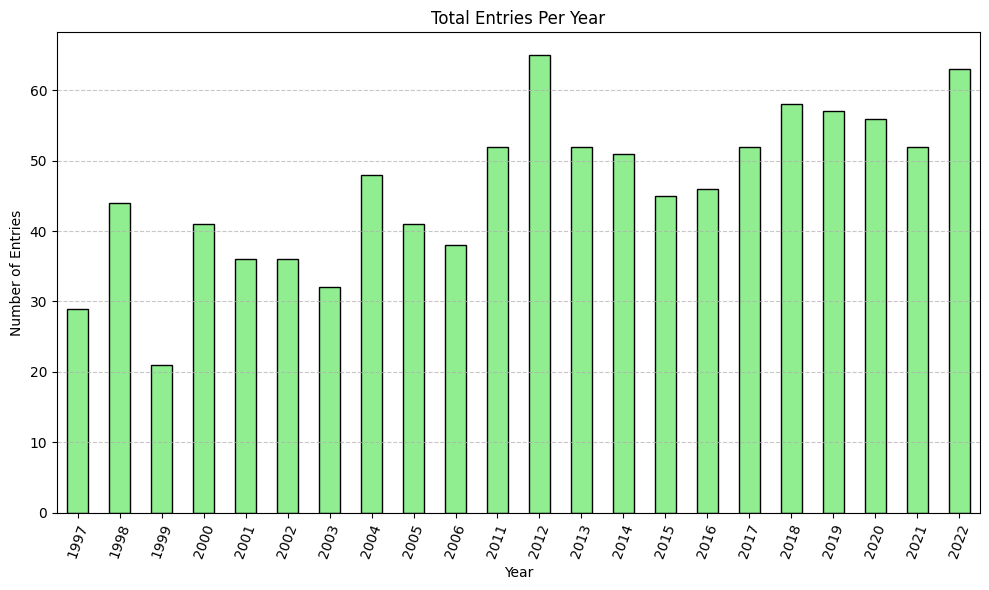

In [12]:
plt.figure(figsize=(10, 6))
categories_by_year.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title('Total Entries Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Entries')

plt.xticks(rotation=70)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## Parse song

When trying to parse the song, sometimes the element with in the quotes is the name of the artist. If both columns are equal, replace the song name with None

In [13]:
df['song'] = None

In [19]:
def song_parser(value):
    if value is None:
        return None
    
    result = re.search(r'\“(.*)\”', value)
    if result:
        return result.group(1)
    return value

df.song = df.winner.map(song_parser)

In [49]:
df.song = df.song.mask(df.winner == df.song, None)
df.tail(n=10)

,year,category,winner,song
469,2022,Top Rap Male Artist,Drake,None
470,2022,Top Female Artist,Olivia Rodrigo,None
463,2022,Top R&B Female Artist,Doja Cat,None
464,2022,Top Artist,Drake,None
465,2022,Top R&B Tour,Bruno Mars (Bruno Mars at Park MGM),None
466,2022,Top New Artist,Olivia Rodrigo,None
474,2022,Top Hot 100 Artist,Olivia Rodrigo,None
473,2022,Top Billboard 200 Artist,Taylor Swift,None
472,2022,Top Duo/Group,BTS,None
471,2022,Top Rap Female Artist,Megan Thee Stallion,None


In [50]:
df.to_csv(TMP_DIR / 'billboard_winners.csv', index=False)